In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_raw = "Dataset/Raw-Data"
output_folder = "Dataset/After-PreProcess"

Load Fifa Ratings

In [3]:
fifa_ratings =  pd.read_csv(r"Dataset\After-PreProcess\predict-by-rating\Combined_Data.csv",low_memory = False)

In [5]:
fifa_ratings = fifa_ratings.drop("Unnamed: 0", axis=1)

In [6]:
fifa_ratings

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,version,Next_Overall,Next_Year_Club,DefensiveAwareness
0,176580,L. Suárez,29,92,92,FC Barcelona,107500000,250000,5.0,4.0,...,27.0,25.0,31.0,33.0,37.0,ST,2017,92.0,FC Barcelona,50
1,178518,R. Nainggolan,28,86,86,Roma,93000000,140000,3.0,3.0,...,11.0,11.0,14.0,8.0,11.0,CDM,2017,86.0,Roma,79
2,181872,A. Vidal,29,87,87,FC Bayern München,44500000,135000,4.0,4.0,...,4.0,2.0,4.0,2.0,4.0,CDM,2017,86.0,FC Bayern München,85
3,197445,D. Alaba,24,86,89,FC Bayern München,125500000,350000,4.0,4.0,...,5.0,7.0,14.0,15.0,9.0,LB,2017,85.0,FC Bayern München,81
4,195864,P. Pogba,23,88,94,Manchester United,37000000,45000,4.0,4.0,...,5.0,6.0,2.0,4.0,3.0,CAM,2017,88.0,Manchester United,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68477,254562,A. Abaz,19,50,70,FC St. Gallen 1879,120000,500,1.0,2.0,...,49.0,53.0,50.0,48.0,50.0,GK,2022,50.0,FC Winterthur,7
68478,262373,F. Chalupniczak,20,51,63,Sutton United,120000,800,1.0,2.0,...,50.0,52.0,51.0,51.0,52.0,GK,2022,51.0,Sutton United,9
68479,263373,J. Searle,20,51,64,Swansea City,120000,2000,1.0,3.0,...,51.0,53.0,52.0,49.0,50.0,GK,2022,51.0,Barnsley,7
68480,259718,F. Gebhardt,19,52,66,FC Basel 1893,170000,650,1.0,3.0,...,53.0,45.0,47.0,52.0,57.0,GK,2022,58.0,Hallescher FC,6


In [19]:
fifa_ratings_names = split_name_column(fifa_ratings.copy(), "Name" , "Name_Adjusted")

In [20]:
fifa_ratings_names

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,GKPositioning,GKReflexes,Best Position,version,Next_Overall,Next_Year_Club,DefensiveAwareness,Name_Adjusted,First Initial,Last Name
0,176580,L. Suárez,29,92,92,FC Barcelona,107500000,250000,5.0,4.0,...,33.0,37.0,ST,2017,92.0,FC Barcelona,50,L. Suárez,L,Suárez
1,178518,R. Nainggolan,28,86,86,Roma,93000000,140000,3.0,3.0,...,8.0,11.0,CDM,2017,86.0,Roma,79,R. Nainggolan,R,Nainggolan
2,181872,A. Vidal,29,87,87,FC Bayern München,44500000,135000,4.0,4.0,...,2.0,4.0,CDM,2017,86.0,FC Bayern München,85,A. Vidal,A,Vidal
3,197445,D. Alaba,24,86,89,FC Bayern München,125500000,350000,4.0,4.0,...,15.0,9.0,LB,2017,85.0,FC Bayern München,81,D. Alaba,D,Alaba
4,195864,P. Pogba,23,88,94,Manchester United,37000000,45000,4.0,4.0,...,4.0,3.0,CAM,2017,88.0,Manchester United,72,P. Pogba,P,Pogba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68477,254562,A. Abaz,19,50,70,FC St. Gallen 1879,120000,500,1.0,2.0,...,48.0,50.0,GK,2022,50.0,FC Winterthur,7,A. Abaz,A,Abaz
68478,262373,F. Chalupniczak,20,51,63,Sutton United,120000,800,1.0,2.0,...,51.0,52.0,GK,2022,51.0,Sutton United,9,F. Chalupniczak,F,Chalupniczak
68479,263373,J. Searle,20,51,64,Swansea City,120000,2000,1.0,3.0,...,49.0,50.0,GK,2022,51.0,Barnsley,7,J. Searle,J,Searle
68480,259718,F. Gebhardt,19,52,66,FC Basel 1893,170000,650,1.0,3.0,...,52.0,57.0,GK,2022,58.0,Hallescher FC,6,F. Gebhardt,F,Gebhardt


In [21]:
fifa_ratings_names.columns

Index(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position', 'version',
       'Next_Overall', 'Next_Year_Club', 'DefensiveAwareness', 'Name_Adjusted',
       'First Initial', 'Last Name'],
      dtype='object')

Load Real Life Stats Ratings

In [7]:
big_5_path = r"Dataset\Raw-Data\players_stats\big_5"

In [11]:
stats_18 = pd.read_csv(big_5_path+ r"\big_5_17-18.csv",low_memory = False)
stats_19 = pd.read_csv(big_5_path+ r"\big_5_18-19.csv",low_memory = False)
stats_20 = pd.read_csv(big_5_path+ r"\big_5_19-20.csv",low_memory = False)
stats_21 = pd.read_csv(big_5_path+ r"\big_5_20-21.csv",low_memory = False)
stats_22 = pd.read_csv(big_5_path+ r"\big_5_21-22.csv",low_memory = False)
stats_23 = pd.read_csv(big_5_path+ r"\big_5_22--23.csv",low_memory = False)

In [12]:
stats_18["version"]= 2018
stats_19["version"]= 2019
stats_20["version"]= 2020
stats_21["version"]= 2021
stats_22["version"]= 2022
stats_23["version"]= 2023

In [13]:
combined_stats_df = df = pd.concat([stats_18 , stats_19 , stats_20 , stats_21 , stats_22, stats_23])

In [14]:
combined_stats_df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.21,0.25,0.13,0.09,0.21,0.13,0.21,Matches,5f09991f,2018
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.00,0.04,0.00,0.04,0.04,0.04,Matches,c5942695,2018
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.00,0.00,0.03,0.03,0.06,0.03,0.06,Matches,c5942695,2018
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.09,0.09,0.01,0.04,0.06,0.01,0.06,Matches,1c529186,2018
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.00,0.02,0.00,0.02,0.02,0.02,Matches,2f798b41,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.00,2.81,0.33,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.00,0.04,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.46,0.67,0.30,0.23,0.53,0.30,0.53,Matches,79300479,2023
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.16,0.11,0.08,0.18,0.11,0.18,Matches,405f6586,2023


In [15]:
import pandas as pd

def eliminate_numbers(df, column_name, new_col):
    df[new_col] = df[column_name].str.replace('\d+', '', regex=True)
    return df

def get_initials(df, column_name , new_col):
    df[new_col] = df[column_name].apply(lambda x: ' '.join([n[0] if i == 0 else n for i, n in enumerate(x.split())]))
    df[new_col] = df[column_name].str.replace(' ', '. ', regex=False)
    return df


def split_name_column(df, column_name , new_col):
    df = eliminate_numbers(df, column_name , new_col)
    df = get_initials(df, new_col , new_col)
    # Split full names into first initial and last name
    df['First Initial'] = df[new_col].str.extract(r'^(\w)\.?\s').fillna('')
    df['Last Name'] = df[new_col].str.extract(r'^(?:\w\.?\s)?(.+)$')
    df['Last Name'] = df['Last Name'].str.replace('. ', ' ', regex=False)
    return df


In [16]:
combined_stats_df_names = split_name_column(combined_stats_df.copy(), "Player" , "Name_Adjusted")

In [17]:
combined_stats_df_names

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,version,Name_Adjusted,First Initial,Last Name
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,...,0.09,0.21,0.13,0.21,Matches,5f09991f,2018,P. van. Aanholt,P,van Aanholt
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,...,0.00,0.04,0.04,0.04,Matches,c5942695,2018,R. Aarons,R,Aarons
2,3,Rolando Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,...,0.03,0.06,0.03,0.06,Matches,c5942695,2018,R. Aarons,R,Aarons
3,4,Ignazio Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,...,0.04,0.06,0.01,0.06,Matches,1c529186,2018,I. Abate,I,Abate
4,5,Aymen Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,...,0.00,0.02,0.02,0.02,Matches,2f798b41,2018,A. Abdennour,A,Abdennour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2822,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,25-233,1997.0,2,0,...,0.06,0.40,0.33,0.40,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2822,2823,Szymon Żurkowski,pl POL,MF,Spezia,it Serie A,25-233,1997.0,7,2,...,0.00,0.04,0.04,0.04,Matches,4e1d5e59,2023,S. Żurkowski,S,Żurkowski
2823,2824,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24-150,1998.0,35,35,...,0.23,0.53,0.30,0.53,Matches,79300479,2023,M. Ødegaard,M,Ødegaard
2824,2825,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,32-359,1990.0,25,11,...,0.08,0.18,0.11,0.18,Matches,405f6586,2023,M. Đurić,M,Đurić


In [24]:
merged_df = pd.merge(fifa_ratings_names, combined_stats_df_names, how='inner', left_on=['Age', 'Last Name', 'Club', 'version'], 
                     right_on=['Age', 'Last Name', 'Squad' , 'version'])

In [25]:
merged_df

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches,-9999,Name_Adjusted_y,First Initial_y
0,178518,R. Nainggolan,29,86,86,Roma,93000000,140000,3.0,3.0,...,0.38,0.11,0.21,0.32,0.11,0.32,Matches,1f9328da,R. Nainggolan,R
1,203551,A. Florenzi,26,82,83,Roma,44500000,135000,3.0,3.0,...,0.15,0.14,0.17,0.32,0.12,0.29,Matches,e288d4b3,A. Florenzi,A
2,192985,K. De Bruyne,26,91,92,Manchester City,40500000,115000,4.0,5.0,...,0.70,0.15,0.32,0.48,0.15,0.48,Matches,e46012d4,K. De. Bruyne,K
3,185103,A. Kolarov,31,81,81,Roma,53000000,220000,2.0,3.0,...,0.24,0.07,0.27,0.34,0.07,0.34,Matches,eda40760,A. Kolarov,A
4,177003,L. Modrić,31,89,89,Real Madrid,32000000,190000,4.0,4.0,...,0.32,0.08,0.19,0.27,0.08,0.27,Matches,6025fab1,L. Modrić,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,240311,L. Zidane,23,70,78,Rayo Vallecano,3100000,7000,1.0,3.0,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,c818c4d9,L. Zidane,L
3596,258585,I. Pandur,21,72,79,Hellas Verona,4099999,9000,1.0,3.0,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,457cb02f,I. Pandur,I
3597,240091,G. Vicario,24,72,78,Empoli,3000000,13000,1.0,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,77d6fd4d,G. Vicario,G
3598,194894,F. Rossi,30,60,60,Atalanta,160000,5000,1.0,2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,Matches,7b5f516f,F. Rossi,F


<AxesSubplot:xlabel='Overall', ylabel='Gls'>

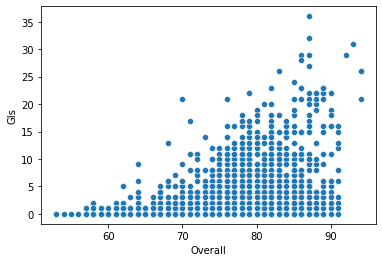

In [27]:
import seaborn as sns

sns.scatterplot(merged_df , x='Overall', y='Gls')

<AxesSubplot:xlabel='Next_Overall', ylabel='Gls'>

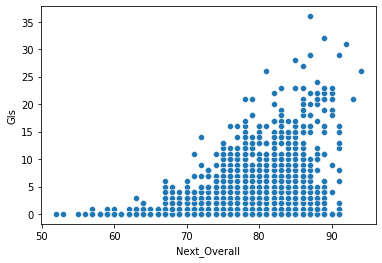

In [30]:
sns.scatterplot(merged_df , x='Next_Overall', y='Gls')

In [31]:
map_position= {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'ST': 'Forward',
    'CF': 'Forward',
    'RF': 'Forward',
    'LF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward'
}

In [32]:
merged_df['Position'] = merged_df['Best Position'].map(map_position)
prem_position_groups = merged_df.groupby('Position')

positions = {}
for position, group in prem_position_groups:
    positions[str(position)] = pd.DataFrame(group)

    
stats_defenders_df = positions['Defender']
stats_forward_df = positions['Forward']
stats_gk_df = positions['Goalkeeper']
stats_midfielders_df = positions['Midfielder']

Export Data

In [ ]:
stats_defenders_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_defenders_df.csv',mode='w',header=True, index=True)
stats_forward_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_forward_df.csv',mode='w',header=True, index=True)
stats_gk_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_gk_df.csv',mode='w',header=True, index=True)
stats_midfielders_df.to_csv(output_folder+'/predict-with-real-life-stats/stats_midfielders_df.csv',mode='w',header=True, index=True)